套件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Epochs_PCA

## 資料預處理

In [ ]:
ori_df = pd.read_csv('/content/epochs.csv')
ori_df

,_userId,_datetime,_activity_status,summaryId,date,activityType,activeKilocalories,steps,distanceInMeters,durationInSeconds,activeTimeInSeconds,startTimeInSeconds,startTimeOffsetInSeconds,met,intensity,meanMotionIntensity,maxMotionIntensity
0,x31a515b,2019-12-19 07:45:00,6,x31a515b-5dfab9fc-6,2019-12-19,WALKING,11.0,159.0,121.55,900.0,253.0,1.576713e+09,28800.0,3.216446,ACTIVE,2.509881,3.0
1,x31a515b,2019-12-19 07:45:00,8,x31a515b-5dfab9fc-8,2019-12-19,SEDENTARY,0.0,0.0,0.00,900.0,647.0,1.576713e+09,28800.0,1.000000,SEDENTARY,0.000000,6.0
2,x31a515b,2019-12-19 08:00:00,6,x31a515b-5dfabd80-6,2019-12-19,WALKING,2.0,11.0,8.41,900.0,60.0,1.576714e+09,28800.0,1.000000,ACTIVE,2.000000,2.0
3,x31a515b,2019-12-19 08:00:00,8,x31a515b-5dfabd80-8,2019-12-19,SEDENTARY,0.0,0.0,0.00,900.0,840.0,1.576714e+09,28800.0,1.000000,SEDENTARY,0.000000,4.0
4,x31a515b,2019-12-19 08:15:00,6,x31a515b-5dfac104-6,2019-12-19,WALKING,17.0,169.0,129.19,900.0,290.0,1.576714e+09,28800.0,1.000000,ACTIVE,2.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300664,x30d2ed4,2023-06-01 14:15:00,8,x30d2ed4-64783764-8,2023-06-01,SEDENTARY,0.0,0.0,0.00,900.0,807.0,1.685600e+09,28800.0,1.000000,SEDENTARY,0.000000,4.0
300665,x30d2ed4,2023-06-01 14:30:00,6,x30d2ed4-64783ae8-6,2023-06-01,WALKING,13.0,287.0,210.23,900.0,214.0,1.685601e+09,28800.0,3.854324,ACTIVE,2.000000,2.0
300666,x30d2ed4,2023-06-01 14:30:00,0,x30d2ed4-64783ae8-0,2023-06-01,GENERIC,1.0,0.0,0.00,900.0,0.0,1.685601e+09,28800.0,1.000000,SEDENTARY,0.000000,5.0
300667,x30d2ed4,2023-06-01 14:30:00,8,x30d2ed4-64783ae8-8,2023-06-01,SEDENTARY,2.0,0.0,0.00,900.0,686.0,1.685601e+09,28800.0,1.136987,SEDENTARY,0.000000,5.0


In [ ]:
ori_df=ori_df[ori_df['_userId']=='x31a515b']
ori_df=ori_df[ori_df['_activity_status']!=9]
ori_df.reset_index(drop=True,inplace=True)
ori_df


,_userId,_datetime,_activity_status,summaryId,date,activityType,activeKilocalories,steps,distanceInMeters,durationInSeconds,activeTimeInSeconds,startTimeInSeconds,startTimeOffsetInSeconds,met,intensity,meanMotionIntensity,maxMotionIntensity
0,x31a515b,2019-12-19 07:45:00,6,x31a515b-5dfab9fc-6,2019-12-19,WALKING,11.0,159.0,121.55,900.0,253.0,1.576713e+09,28800.0,3.216446,ACTIVE,2.509881,3.0
1,x31a515b,2019-12-19 07:45:00,8,x31a515b-5dfab9fc-8,2019-12-19,SEDENTARY,0.0,0.0,0.00,900.0,647.0,1.576713e+09,28800.0,1.000000,SEDENTARY,0.000000,6.0
2,x31a515b,2019-12-19 08:00:00,6,x31a515b-5dfabd80-6,2019-12-19,WALKING,2.0,11.0,8.41,900.0,60.0,1.576714e+09,28800.0,1.000000,ACTIVE,2.000000,2.0
3,x31a515b,2019-12-19 08:00:00,8,x31a515b-5dfabd80-8,2019-12-19,SEDENTARY,0.0,0.0,0.00,900.0,840.0,1.576714e+09,28800.0,1.000000,SEDENTARY,0.000000,4.0
4,x31a515b,2019-12-19 08:15:00,6,x31a515b-5dfac104-6,2019-12-19,WALKING,17.0,169.0,129.19,900.0,290.0,1.576714e+09,28800.0,1.000000,ACTIVE,2.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6171,x31a515b,2020-05-27 07:00:00,8,x31a515b-5ecd9f70-8,2020-05-27,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.590534e+09,28800.0,1.000000,SEDENTARY,0.000000,4.0
6172,x31a515b,2020-05-27 07:15:00,6,x31a515b-5ecda2f4-6,2020-05-27,WALKING,1.0,70.0,53.19,900.0,113.0,1.590535e+09,28800.0,1.451871,ACTIVE,3.000000,3.0
6173,x31a515b,2020-05-27 07:15:00,8,x31a515b-5ecda2f4-8,2020-05-27,SEDENTARY,0.0,0.0,0.00,900.0,787.0,1.590535e+09,28800.0,1.000000,SEDENTARY,0.000000,6.0
6174,x31a515b,2020-05-27 07:30:00,6,x31a515b-5ecda678-6,2020-05-27,WALKING,3.0,71.0,53.96,420.0,99.0,1.590536e+09,28800.0,2.547317,ACTIVE,2.373737,3.0


In [ ]:
df=ori_df[1025:2000]
df

,_userId,_datetime,_activity_status,summaryId,date,activityType,activeKilocalories,steps,distanceInMeters,durationInSeconds,activeTimeInSeconds,startTimeInSeconds,startTimeOffsetInSeconds,met,intensity,meanMotionIntensity,maxMotionIntensity
1025,x31a515b,2019-12-29 20:00:00,8,x31a515b-5e089540-8,2019-12-29,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.577621e+09,28800.0,1.0,SEDENTARY,0.000000,0.0
1026,x31a515b,2019-12-29 20:15:00,8,x31a515b-5e0898c4-8,2019-12-29,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.577622e+09,28800.0,1.0,SEDENTARY,0.000000,0.0
1027,x31a515b,2019-12-29 20:30:00,8,x31a515b-5e089c48-8,2019-12-29,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.577623e+09,28800.0,1.0,SEDENTARY,0.000000,0.0
1028,x31a515b,2019-12-29 20:45:00,8,x31a515b-5e089fcc-8,2019-12-29,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.577624e+09,28800.0,1.0,SEDENTARY,0.000000,0.0
1029,x31a515b,2019-12-29 21:00:00,8,x31a515b-5e08a350-8,2019-12-29,SEDENTARY,0.0,0.0,0.00,900.0,900.0,1.577624e+09,28800.0,1.0,SEDENTARY,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,x31a515b,2020-05-01 09:15:00,0,x31a515b-5eab7814-0,2020-05-01,GENERIC,4.0,0.0,0.00,900.0,0.0,1.588296e+09,28800.0,1.0,SEDENTARY,0.000000,6.0
1996,x31a515b,2020-05-01 09:15:00,8,x31a515b-5eab7814-8,2020-05-01,SEDENTARY,0.0,0.0,0.00,900.0,780.0,1.588296e+09,28800.0,1.0,SEDENTARY,0.000000,5.0
1997,x31a515b,2020-05-01 09:30:00,6,x31a515b-5eab7b98-6,2020-05-01,WALKING,19.0,184.0,139.81,900.0,466.0,1.588297e+09,28800.0,1.0,ACTIVE,2.158798,4.0
1998,x31a515b,2020-05-01 09:30:00,8,x31a515b-5eab7b98-8,2020-05-01,SEDENTARY,3.0,0.0,0.00,900.0,434.0,1.588297e+09,28800.0,1.0,SEDENTARY,0.000000,5.0


In [ ]:
name_counts = ori_df['_activity_status'].value_counts()
print(name_counts)
a=df['activityType'].value_counts()
print(a)

_activity_status
8    3922
6    1736
0     475
1      43
Name: count, dtype: int64
activityType
SEDENTARY    572
WALKING      312
GENERIC       84
RUNNING        7
Name: count, dtype: int64


_activity_status

---




*   8 = SEDENTARY
*   6 = WALKING
*   0 = GENERIC
*   1 = RUNNING






In [ ]:
df=df[df['durationInSeconds']==900]
columns = ['activeKilocalories', 'steps', 'distanceInMeters', 'activeTimeInSeconds','met','meanMotionIntensity','maxMotionIntensity','activityType']
df=df[columns]
df=df[df['activityType']!='SEDENTARY']
df=df[df['activityType']!='GENERIC']
df.reset_index(drop=True,inplace=True)
df

,activeKilocalories,steps,distanceInMeters,activeTimeInSeconds,met,meanMotionIntensity,maxMotionIntensity,activityType
0,3.0,192.0,146.76,115.0,2.329742,3.000000,3.0,WALKING
1,3.0,114.0,87.15,52.0,3.940776,3.000000,3.0,WALKING
2,0.0,34.0,25.99,11.0,1.000000,2.545455,3.0,WALKING
3,9.0,189.0,144.48,284.0,2.622490,2.366197,3.0,WALKING
4,2.0,44.0,33.63,125.0,1.000000,1.040000,2.0,WALKING
...,...,...,...,...,...,...,...,...
311,10.0,160.0,121.57,285.0,1.000000,2.789474,3.0,WALKING
312,5.0,61.0,46.34,89.0,1.000000,2.000000,2.0,WALKING
313,4.0,55.0,41.79,120.0,1.000000,2.000000,2.0,WALKING
314,19.0,184.0,139.81,466.0,1.000000,2.158798,4.0,WALKING


In [ ]:
a=df['activityType'].value_counts()
print(a)

activityType
SEDENTARY    3896
WALKING      1717
GENERIC       473
RUNNING        42
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93602 entries, 0 to 93601
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   activeKilocalories   93602 non-null  float64
 1   steps                93602 non-null  float64
 2   distanceInMeters     93602 non-null  float64
 3   activeTimeInSeconds  93602 non-null  float64
 4   met                  93602 non-null  float64
 5   meanMotionIntensity  93602 non-null  float64
 6   maxMotionIntensity   93602 non-null  float64
 7   activityType         93602 non-null  object 
dtypes: float64(7), object(1)
memory usage: 5.7+ MB


##PCA



1.   'activeKilocalories'
1.   'steps'
2.   'distanceInMeters'
2.   'activeTimeInSeconds'
1.   'met'
1.   'meanMotionIntensity'
2.   'maxMotionIntensity
2.   '_activity_status'

Original Principal Component Loadings:
[[ 0.49496635  0.48761314  0.50315862  0.50274061  0.10604399 -0.00892739]
 [-0.05814136  0.02913336  0.08540097  0.0914601  -0.63763991  0.75731625]]

Rotated Principal Component Loadings:
[[ 0.44523071  0.46817066  0.50202329  0.50370284 -0.11843694  0.25062841]
 [-0.22392347 -0.13939711 -0.09183972 -0.08600304 -0.6354547   0.71469784]]


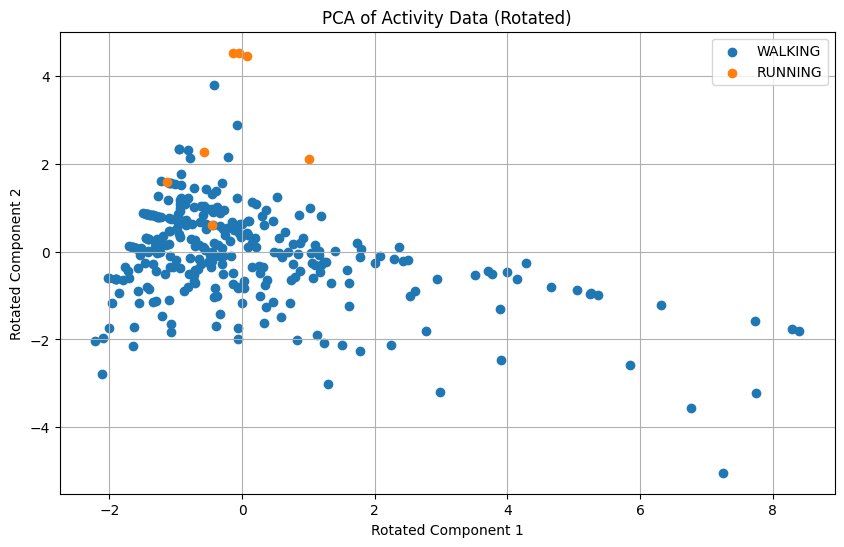

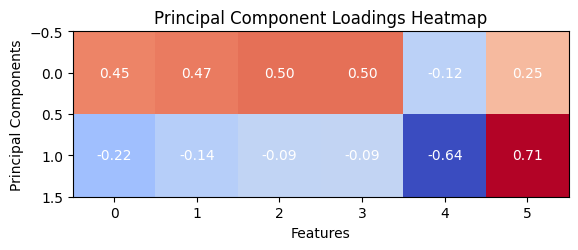

In [ ]:
##Variance-Covariance Matrix
#选择特征和目标变量
X = df[['activeKilocalories','activeTimeInSeconds', 'steps', 'distanceInMeters','met', 'meanMotionIntensity']]
y = df['activityType']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # 提取2个主成分用于可视化
X_pca = pca.fit_transform(X_scaled)

# 打印原始主成分载荷
print("Original Principal Component Loadings:")
print(pca.components_)

# 定义旋转角度（例如45度）
theta = np.radians(20)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# 应用旋转矩阵
rotated_scores = X_pca @ rotation_matrix

# 计算旋转后的主成分载荷
rotated_loadings = rotation_matrix.T @ pca.components_

# 打印旋转后的主成分载荷
print("\nRotated Principal Component Loadings:")
print(rotated_loadings)

# 创建一个DataFrame来存储旋转后的PCA得分和目标变量
pca_df = pd.DataFrame(rotated_scores, columns=['Rotated Component 1', 'Rotated Component 2'])
pca_df['activityType'] = y

# 绘制旋转后的散点图
plt.figure(figsize=(10, 6))
for activity in pca_df['activityType'].unique():
    indices = pca_df['activityType'] == activity
    plt.scatter(pca_df.loc[indices, 'Rotated Component 1'],
                pca_df.loc[indices, 'Rotated Component 2'],
                label=activity)
plt.xlabel('Rotated Component 1')
plt.ylabel('Rotated Component 2')
plt.title('PCA of Activity Data (Rotated)')
plt.legend()
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

# 创建热图
plt.imshow(rotated_loadings, cmap='coolwarm', interpolation='nearest')

# 添加文本标签
for i in range(rotated_loadings.shape[0]):
    for j in range(rotated_loadings.shape[1]):
        plt.text(j, i, "{:.2f}".format(rotated_loadings[i, j]), ha='center', va='center', color='white')

# 添加坐标轴标签和标题
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('Principal Component Loadings Heatmap')

# 显示热图
plt.show()


In [ ]:
pca_5= PCA(5)
pca_5.fit(X_scaled)
np.round(pca_5.explained_variance_ratio_,2)

array([0.6 , 0.18, 0.15, 0.05, 0.03])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPytho

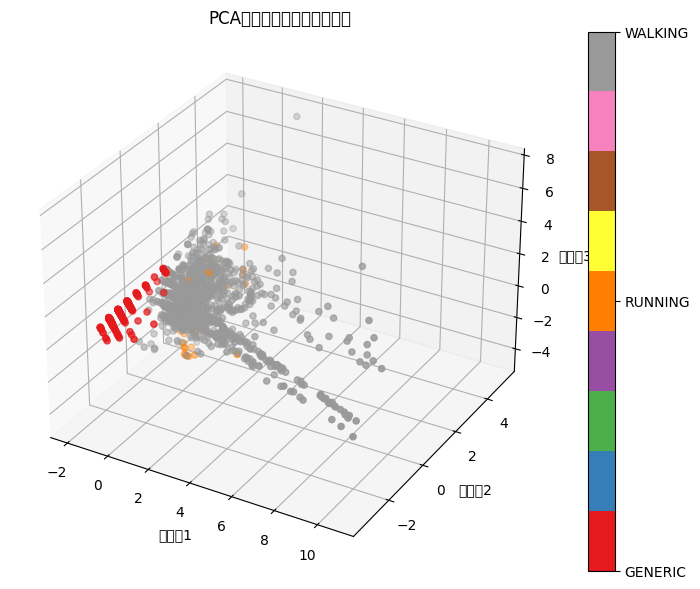

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# 示例数据，假设数据已加载到df中
# df = ...  # 请替换为实际数据加载代码

# 选择特征和目标变量
X = df[['activeKilocalories', 'steps', 'distanceInMeters', 'activeTimeInSeconds', 'met', 'meanMotionIntensity', 'maxMotionIntensity']]
y = df['activityType']

# 将类别标签转换为数值标签
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降到三个维度
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# 创建三维图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 使用背景色表示原始分类
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_numeric, cmap=plt.cm.Set1, marker='o')

# 添加轴标签和标题
ax.set_xlabel('主成分1')
ax.set_ylabel('主成分2')
ax.set_zlabel('主成分3')
ax.set_title('PCA降维到三个维度的数据集')

# 添加颜色条和图例
cbar = plt.colorbar(sc, ax=ax)
cbar.set_ticks(range(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)

plt.show()


In [ ]:
# 。

#Dailies_PCA

##資料預處理

In [ ]:
dori_df=pd.read_csv('/content/dailies.csv')
dori_df

,_userId,_upload_datetime,_activity_status,summaryId,date,activityType,activeKilocalories,bmrKilocalories,steps,distanceInMeters,...,floorsClimbedGoal,averageStressLevel,maxStressLevel,stressDurationInSeconds,restStressDurationInSeconds,activityStressDurationInSeconds,lowStressDurationInSeconds,mediumStressDurationInSeconds,highStressDurationInSeconds,stressQualifier
0,x31a515b,2019-12-20 00:00:00,6,x31a515b-5dfa4d00-15180-6,2019-12-19,WALKING,278.0,1695.0,3123.0,2406.0,...,10.0,12.0,72.0,1800.0,25860.0,1260.0,960.0,840.0,0.0,unknown
1,x31a515b,2019-12-21 00:00:00,6,x31a515b-5dfb9e80-15180-6,2019-12-20,WALKING,0.0,1695.0,0.0,0.0,...,10.0,20.0,90.0,6360.0,25860.0,3000.0,1260.0,3660.0,1440.0,unknown
2,x31a511f,2020-03-28 00:00:00,6,x31a511f-5e7cd180-15180-6,2020-03-27,WALKING,11.0,2247.0,303.0,251.0,...,10.0,14.0,86.0,1500.0,22200.0,1020.0,840.0,360.0,300.0,unknown
3,x3356405,2020-04-06 00:00:00,6,x3356405-5e88af00-15180-6,2020-04-05,WALKING,0.0,1827.0,0.0,0.0,...,10.0,15.0,75.0,1260.0,15900.0,6000.0,960.0,300.0,0.0,unknown
4,x3355eb9,2020-04-08 00:00:00,6,x3355eb9-5e8b5200-15180-6,2020-04-07,WALKING,0.0,2052.0,0.0,0.0,...,10.0,17.0,17.0,0.0,60.0,0.0,0.0,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,x4b8584f,2023-06-01 07:04:00,0,x4b8584f-64776f00-6360-0,2023-06-01,GENERIC,0.0,397.0,48.0,33.0,...,10.0,7.0,24.0,NaN,23700.0,180.0,NaN,NaN,NaN,unknown
6043,x4b85866,2023-06-01 08:03:00,0,x4b85866-64776f00-7134-0,2023-06-01,GENERIC,56.0,647.0,1769.0,1366.0,...,10.0,6.0,86.0,720.0,24840.0,2940.0,120.0,480.0,120.0,unknown
6044,x4bb875d,2023-06-01 09:57:00,0,x4bb875d-64776f00-8bec-0,2023-06-01,GENERIC,46.0,794.0,753.0,553.0,...,10.0,44.0,72.0,1320.0,120.0,1260.0,840.0,480.0,NaN,unknown
6045,x4bb875d,2023-06-01 10:53:00,0,x4bb875d-64776f00-990c-0,2023-06-01,GENERIC,53.0,868.0,855.0,610.0,...,10.0,26.0,72.0,1500.0,3000.0,1440.0,900.0,600.0,NaN,unknown


In [ ]:
name_counts = dori_df['stepsGoal'].value_counts()
print(name_counts)
a= dori_df['floorsClimbedGoal'].value_counts()
print(a)

stepsGoal
10000.0    556
9560.0     153
12040.0    139
6000.0     107
7500.0      64
          ... 
13370.0      1
4640.0       1
10870.0      1
11730.0      1
3760.0       1
Name: count, Length: 816, dtype: int64
floorsClimbedGoal
10.0    5775
5.0      180
4.0       41
8.0       32
2.0       14
20.0       5
Name: count, dtype: int64


In [ ]:
d_df=dori_df.iloc[:,5:]
d_df.drop(columns=['durationInSeconds','startTimeInSeconds','startTimeOffsetInSeconds','moderateIntensityDurationInSecon','vigorousIntensityDurationInSecon'], inplace=True)
d_df=dori_df.dropna()
d_df.head()

,_userId,_upload_datetime,_activity_status,summaryId,date,activityType,activeKilocalories,bmrKilocalories,steps,distanceInMeters,...,floorsClimbedGoal,averageStressLevel,maxStressLevel,stressDurationInSeconds,restStressDurationInSeconds,activityStressDurationInSeconds,lowStressDurationInSeconds,mediumStressDurationInSeconds,highStressDurationInSeconds,stressQualifier
0,x31a515b,2019-12-20 00:00:00,6,x31a515b-5dfa4d00-15180-6,2019-12-19,WALKING,278.0,1695.0,3123.0,2406.0,...,10.0,12.0,72.0,1800.0,25860.0,1260.0,960.0,840.0,0.0,unknown
1,x31a515b,2019-12-21 00:00:00,6,x31a515b-5dfb9e80-15180-6,2019-12-20,WALKING,0.0,1695.0,0.0,0.0,...,10.0,20.0,90.0,6360.0,25860.0,3000.0,1260.0,3660.0,1440.0,unknown
2,x31a511f,2020-03-28 00:00:00,6,x31a511f-5e7cd180-15180-6,2020-03-27,WALKING,11.0,2247.0,303.0,251.0,...,10.0,14.0,86.0,1500.0,22200.0,1020.0,840.0,360.0,300.0,unknown
3,x3356405,2020-04-06 00:00:00,6,x3356405-5e88af00-15180-6,2020-04-05,WALKING,0.0,1827.0,0.0,0.0,...,10.0,15.0,75.0,1260.0,15900.0,6000.0,960.0,300.0,0.0,unknown
4,x3355eb9,2020-04-08 00:00:00,6,x3355eb9-5e8b5200-15180-6,2020-04-07,WALKING,0.0,2052.0,0.0,0.0,...,10.0,17.0,17.0,0.0,60.0,0.0,0.0,0.0,0.0,unknown


In [ ]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5322 entries, 0 to 6043
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   _userId                           5322 non-null   object 
 1   _upload_datetime                  5322 non-null   object 
 2   _activity_status                  5322 non-null   int64  
 3   summaryId                         5322 non-null   object 
 4   date                              5322 non-null   object 
 5   activityType                      5322 non-null   object 
 6   activeKilocalories                5322 non-null   float64
 7   bmrKilocalories                   5322 non-null   float64
 8   steps                             5322 non-null   float64
 9   distanceInMeters                  5322 non-null   float64
 10  durationInSeconds                 5322 non-null   float64
 11  activeTimeInSeconds               5322 non-null   float64
 12  startTimeIn

##PCA

#Dailies_heartrate


In [ ]:
dhori_df=pd.read_csv('/content/dailies_heartrate.csv')
dh_col=['timeseconds','HeartRate','_activity_status']
dh_df=dhori_df[dh_col]
dh_df=dh_df.dropna()
dh_df.reset_index(drop=True)


,timeseconds,HeartRate,_activity_status
0,15.0,69.0,6.0
1,30.0,69.0,6.0
2,45.0,69.0,6.0
3,60.0,69.0,6.0
4,75.0,69.0,6.0
...,...,...,...
620359,13170.0,62.0,6.0
620360,13185.0,62.0,6.0
620361,13185.0,62.0,6.0
620362,13185.0,64.0,6.0


from matplotlib import pyplot as plt
_df_0['timeseconds'].plot(kind='hist', bins=20, title='timeseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HeartRate'].plot(kind='hist', bins=20, title='HeartRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='timeseconds', y='HeartRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timeseconds']
  ys = series['HeartRate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('timeseconds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timeseconds')
_ = plt.ylabel('HeartRate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timeseconds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timeseconds'}, axis=1)
              .sort_values('timeseconds', ascending=True))
  xs = counted['timeseconds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('timeseconds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timeseconds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['_activity_status']
  ys = series['HeartRate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('_activity_status', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_activity_status')
_ = plt.ylabel('HeartRate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['_activity_status']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '_activity_status'}, axis=1)
              .sort_values('_activity_status', ascending=True))
  xs = counted['_activity_status']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('_activity_status', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_activity_status')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['timeseconds'].plot(kind='line', figsize=(8, 4), title='timeseconds')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['HeartRate'].plot(kind='line', figsize=(8, 4), title='HeartRate')
plt.gca().spines[['top', 'right']].set_visible(False)

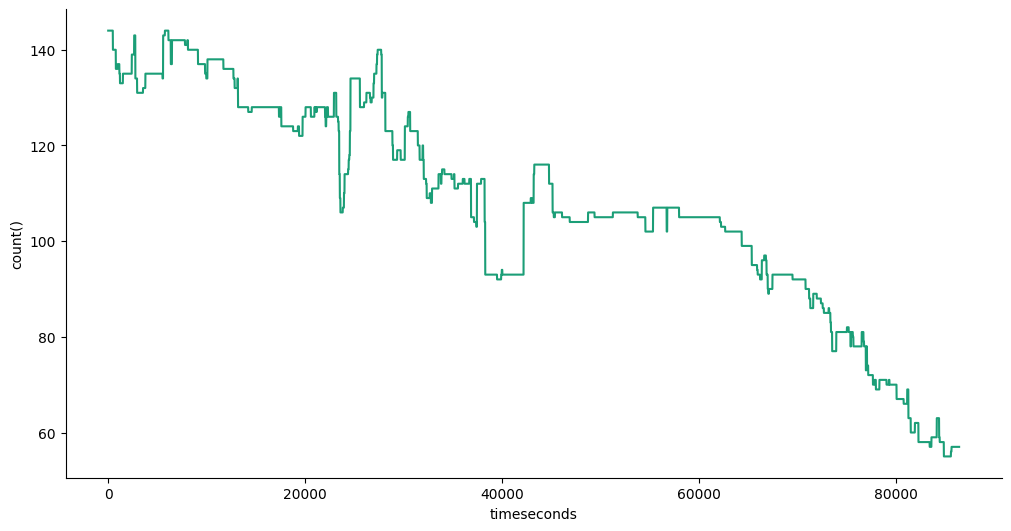

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timeseconds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timeseconds'}, axis=1)
              .sort_values('timeseconds', ascending=True))
  xs = counted['timeseconds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('timeseconds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timeseconds')
_ = plt.ylabel('count()')

In [ ]:
dh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620364 entries, 27632 to 1324858
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timeseconds       620364 non-null  float64
 1   HeartRate         620364 non-null  float64
 2   _activity_status  620364 non-null  float64
dtypes: float64(3)
memory usage: 18.9 MB


In [ ]:
nan_count =dh_df['_activity_status'].isna().sum()
print(nan_count)

259104
